# Importing Libraries

In [30]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.graph_objs as go
from plotly.offline import iplot

In [31]:
data = pd.read_csv(r'C:\Users\PC\Downloads\1.csv')
print(data.head())

   Unnamed: 0  Order ID               Product  Quantity Ordered  Price Each  \
0           0    295665    Macbook Pro Laptop                 1     1700.00   
1           1    295666    LG Washing Machine                 1      600.00   
2           2    295667  USB-C Charging Cable                 1       11.95   
3           3    295668      27in FHD Monitor                 1      149.99   
4           4    295669  USB-C Charging Cable                 1       11.95   

         Order Date                        Purchase Address  Month    Sales  \
0   30/12/2019 0:01  136 Church St, New York City, NY 10001     12  1700.00   
1   29/12/2019 7:03     562 2nd St, New York City, NY 10001     12   600.00   
2  12/12/2019 18:21    277 Main St, New York City, NY 10001     12    11.95   
3  22/12/2019 15:13     410 6th St, San Francisco, CA 94016     12   149.99   
4  18/12/2019 12:38           43 Hill St, Atlanta, GA 30301     12    11.95   

             City  Hour  
0   New York City     0 

# Data Cleaning

In [32]:
print(data.dtypes)

Unnamed: 0            int64
Order ID              int64
Product              object
Quantity Ordered      int64
Price Each          float64
Order Date           object
Purchase Address     object
Month                 int64
Sales               float64
City                 object
Hour                  int64
dtype: object


In [33]:
print(data.isnull().sum())

Unnamed: 0          0
Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
Month               0
Sales               0
City                0
Hour                0
dtype: int64


In [34]:
data=data.dropna(how="all")
print(data.shape)

(185950, 11)


In [35]:
#Adding month column
def month(x):
    return x.split('/')[1]
data['month']=data['Order Date'].apply(month)
print(data.groupby('month')['month'].count())

month
01     9709
02    11975
03    15153
04    18279
05    16566
06    13554
07    14293
08    11961
09    11621
10    20282
11    17573
12    24984
Name: month, dtype: int64


In [36]:
print(data.dtypes)

Unnamed: 0            int64
Order ID              int64
Product              object
Quantity Ordered      int64
Price Each          float64
Order Date           object
Purchase Address     object
Month                 int64
Sales               float64
City                 object
Hour                  int64
month                object
dtype: object


In [37]:
print(len(data))

185950


In [38]:
print(data['Month'])

0         12
1         12
2         12
3         12
4         12
          ..
185945     6
185946     6
185947     6
185948     6
185949     6
Name: Month, Length: 185950, dtype: int64


In [39]:
data['Price Each'] = data['Price Each'].astype(float)
data['Quantity Ordered'] = data['Quantity Ordered'].astype(int)
data['Sales'] = data['Quantity Ordered']*data['Price Each']
print(data.head(3))

   Unnamed: 0  Order ID               Product  Quantity Ordered  Price Each  \
0           0    295665    Macbook Pro Laptop                 1     1700.00   
1           1    295666    LG Washing Machine                 1      600.00   
2           2    295667  USB-C Charging Cable                 1       11.95   

         Order Date                        Purchase Address  Month    Sales  \
0   30/12/2019 0:01  136 Church St, New York City, NY 10001     12  1700.00   
1   29/12/2019 7:03     562 2nd St, New York City, NY 10001     12   600.00   
2  12/12/2019 18:21    277 Main St, New York City, NY 10001     12    11.95   

             City  Hour month  
0   New York City     0    12  
1   New York City     7    12  
2   New York City    18    12  


In [40]:
#Which city has max order?
'917 1st St, Dallas, TX 75001'.split(',')[1]


' Dallas'

In [41]:
def city(x):
    return x.split(',')[1]

In [42]:
data['city'] = data['Purchase Address'].apply(city)

In [43]:
print(data.groupby('city')['city'].count())

city
 Atlanta          14881
 Austin            9905
 Boston           19934
 Dallas           14820
 Los Angeles      29605
 New York City    24876
 Portland         12465
 San Francisco    44732
 Seattle          14732
Name: city, dtype: int64


Axes(0.125,0.11;0.775x0.77)


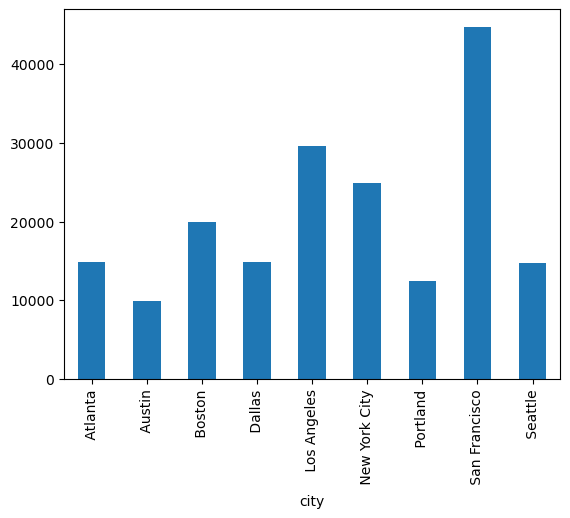

In [44]:
print(data.groupby('city')['Quantity Ordered'].count().plot(kind='bar'))

In [45]:
#San Fransisco is the city with max orders

Axes(0.125,0.11;0.775x0.77)


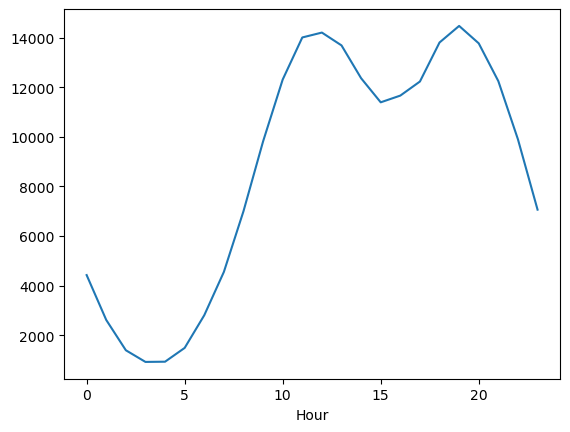

In [46]:
print(data.groupby('Hour')['Quantity Ordered'].sum().plot(kind='line'))
    

In [47]:
#Between 12 PM and 7 PM is the best time to make adverts

Axes(0.125,0.11;0.775x0.77)


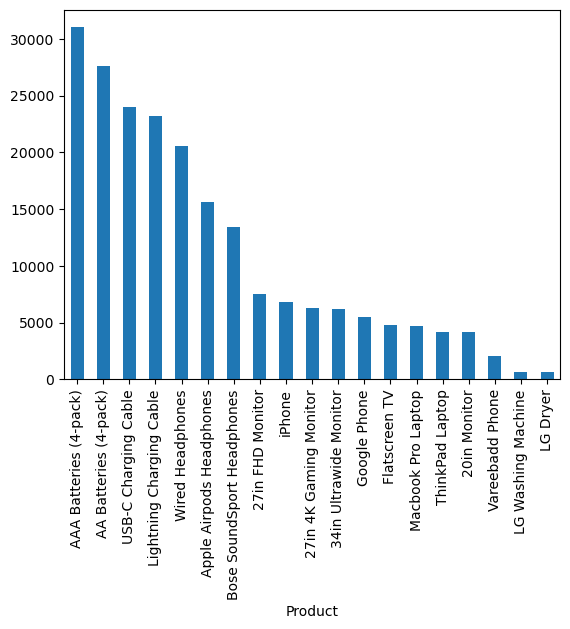

In [48]:
#Which product should be sold the most
print(data.groupby('Product')['Quantity Ordered'].sum().sort_values(ascending=False).plot(kind='bar'))

In [49]:
print(data.groupby('Product')['Price Each'].mean().sort_values(ascending=True))

Product
AAA Batteries (4-pack)           2.99
AA Batteries (4-pack)            3.84
USB-C Charging Cable            11.95
Wired Headphones                11.99
Lightning Charging Cable        14.95
Bose SoundSport Headphones      99.99
20in Monitor                   109.99
27in FHD Monitor               149.99
Apple Airpods Headphones       150.00
Flatscreen TV                  300.00
34in Ultrawide Monitor         379.99
27in 4K Gaming Monitor         389.99
Vareebadd Phone                400.00
Google Phone                   600.00
LG Washing Machine             600.00
LG Dryer                       600.00
iPhone                         700.00
ThinkPad Laptop                999.99
Macbook Pro Laptop            1700.00
Name: Price Each, dtype: float64


In [50]:
#AAA & AA Batteries should be the products to be sold most
#It looks like the cheaper the product the higher the sales and vice versa

In [51]:
#Let's see what are the most products purchased together 
df=data[data['Order ID'].duplicated(keep=False)]
print(df.head(25))

     Unnamed: 0  Order ID                     Product  Quantity Ordered  \
16           16    295681                Google Phone                 1   
17           17    295681        USB-C Charging Cable                 1   
18           18    295681  Bose SoundSport Headphones                 1   
19           19    295681            Wired Headphones                 1   
36           36    295698             Vareebadd Phone                 1   
37           37    295698        USB-C Charging Cable                 2   
42           42    295703       AA Batteries (4-pack)                 1   
43           43    295703  Bose SoundSport Headphones                 1   
66           66    295726                      iPhone                 1   
67           67    295726    Lightning Charging Cable                 1   
76           76    295735                      iPhone                 1   
77           77    295735    Apple Airpods Headphones                 1   
78           78    295735

C:\Users\PC\AppData\Local\Temp\ipykernel_4428\783086903.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



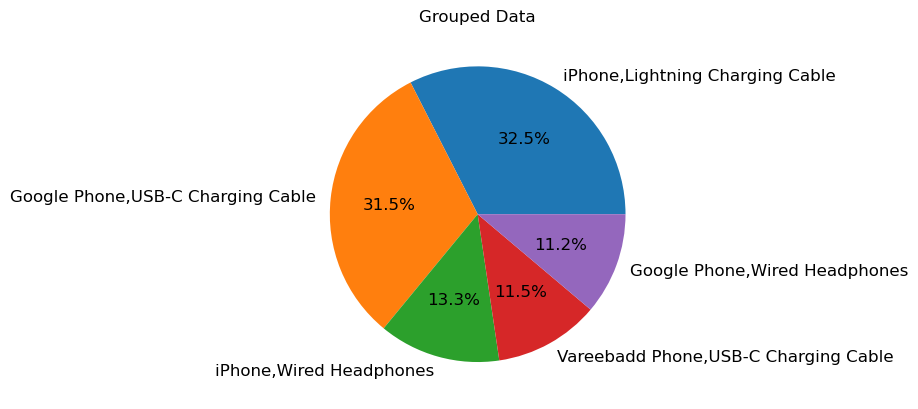

None


In [52]:
df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
df2 = df.drop_duplicates(subset=['Order ID'])

values = df2['Grouped'].value_counts().head(5)

plt.pie(values, labels=values.index, autopct='%1.1f%%', textprops={'fontsize': 12})
plt.title('Grouped Data')
print(plt.show())